Dataset loaded with shape: (25600, 11)

=== Dataset Analysis ===
Dataset shape: (25600, 11)
Column names: ['ids', 'name', 'text', 'label', 'id', 'gender', 'age', 'age_bucket', 'dominant_emotion', 'dominant_race', 'translated_text']

Label distribution:
label
1    17388
0     8212
Name: count, dtype: int64

Sample translated_text entries:
1: Amma: HSC It's coming , from now on and , I'll kill all your   Me: mobile laptops          ...
2: WHEN YOUR COUSINS TAKES YOU TO THE DHAN KHET AND SHOWS HIS KALO BONDUK...
3: WHEN HE SAID 10 MINUTES BUT IT WAS ONLY 2 MINUTES...
4: SHE - I CAN'T BE WITH YOU   - I want you to ...
5: When you Teacher say   "tell the truth, then don't say anything"  brother, what a fool's got in my ?...

Missing values by column:
ids                     0
name                    0
text                  285
label                   0
id                  18554
gender              18554
age                 18554
age_bucket          18554
dominant_emotion    18554
dominant_r

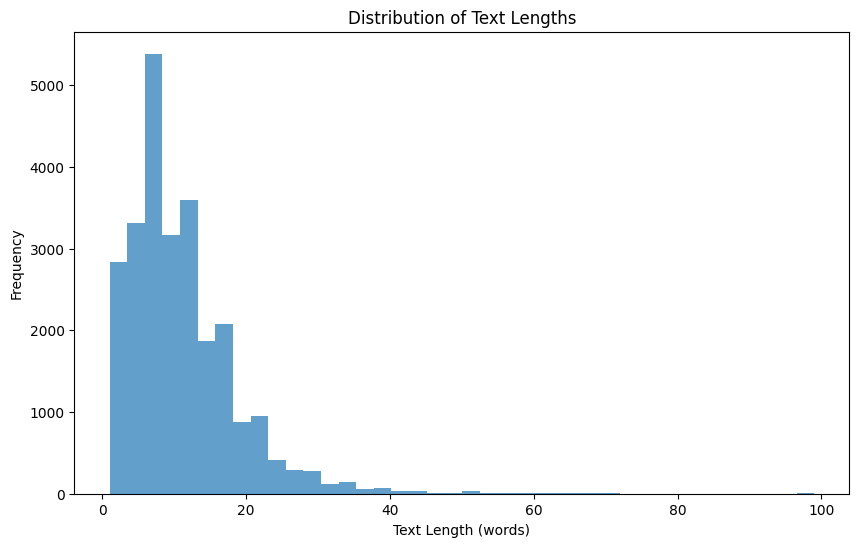

Train set: 17920, Validation set: 3840, Test set: 3840

Generating learning curves...


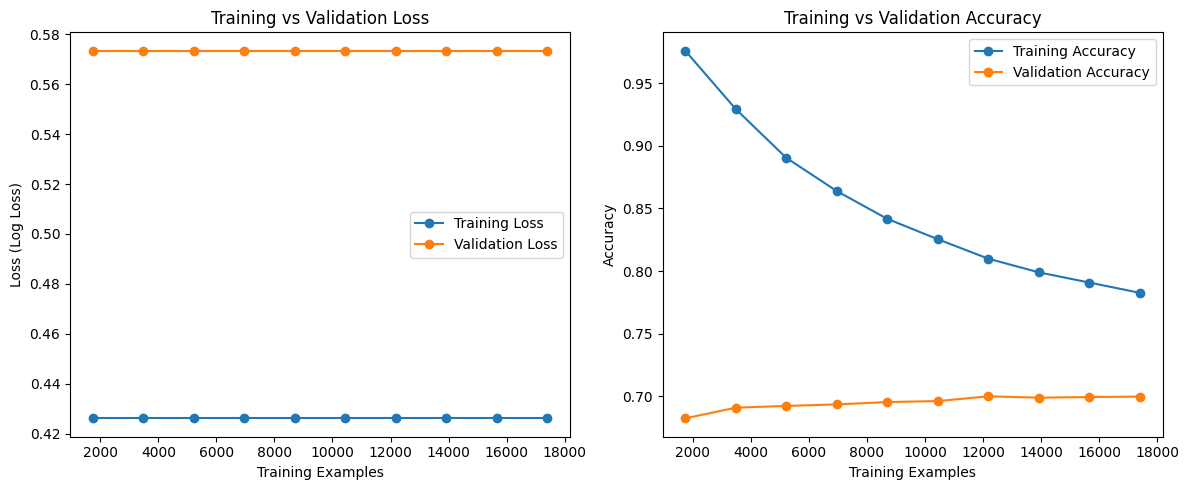


Performing hyperparameter tuning...
Alpha = 0.001: Validation accuracy = 0.7010, Loss = 0.6173
Alpha = 0.01: Validation accuracy = 0.7018, Loss = 0.5885
Alpha = 0.1: Validation accuracy = 0.7065, Loss = 0.5663
Alpha = 0.5: Validation accuracy = 0.7081, Loss = 0.5566
Alpha = 1.0: Validation accuracy = 0.7120, Loss = 0.5577

Best alpha value: 1.0 with validation accuracy: 0.7120


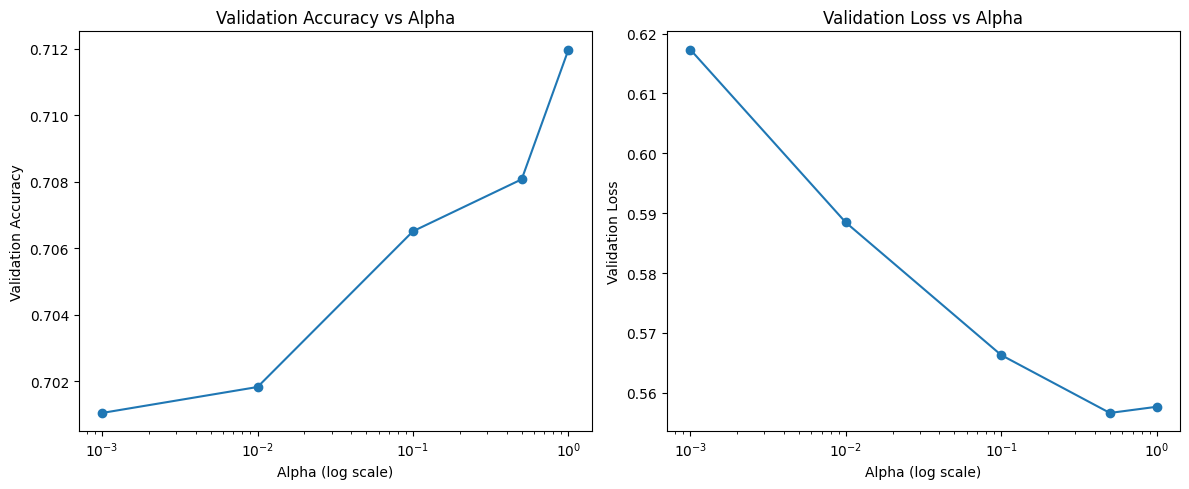


Training final model on combined training and validation data...

Evaluating final model on test set...
Test Accuracy: 0.7089
Test Loss: 0.5582

Confusion Matrix:
[[ 418  814]
 [ 304 2304]]

Classification Report:
              precision    recall  f1-score   support

 Non-Harmful       0.58      0.34      0.43      1232
     Harmful       0.74      0.88      0.80      2608

    accuracy                           0.71      3840
   macro avg       0.66      0.61      0.62      3840
weighted avg       0.69      0.71      0.68      3840



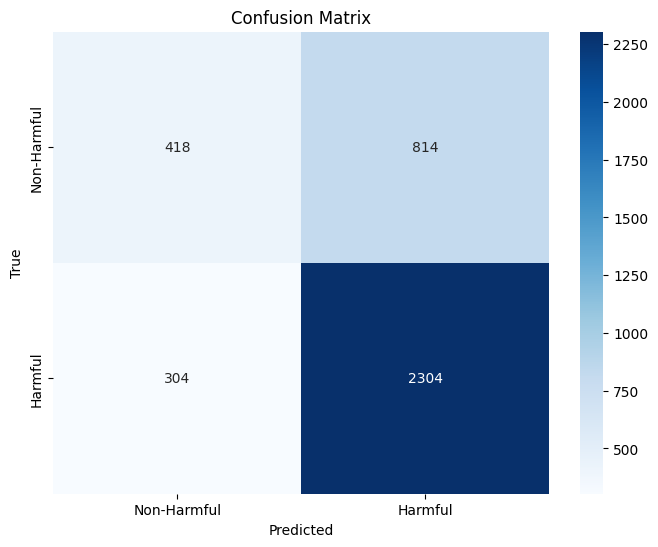

Naive Bayes model saved successfully!

Analyzing feature importance...

Top 20 features for class 'Non-Harmful':
nan: 0.0291
nan nan: 0.0233
30: 0.0063
man: 0.0058
the: 0.0058
you: 0.0055
40: 0.0050
to: 0.0042
white: 0.0042
30 40: 0.0042
happy: 0.0033
20: 0.0033
20 30: 0.0032
in: 0.0032
when: 0.0031
and: 0.0030
is: 0.0030
of: 0.0029
your: 0.0026
it: 0.0025

Top 20 features for class 'Harmful':
nan: 0.0611
nan nan: 0.0490
you: 0.0071
the: 0.0068
to: 0.0047
it: 0.0040
30: 0.0040
of: 0.0036
man: 0.0035
and: 0.0034
is: 0.0033
me: 0.0033
in: 0.0031
my: 0.0031
40: 0.0030
when: 0.0027
your: 0.0027
30 40: 0.0027
white: 0.0025
don: 0.0025


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


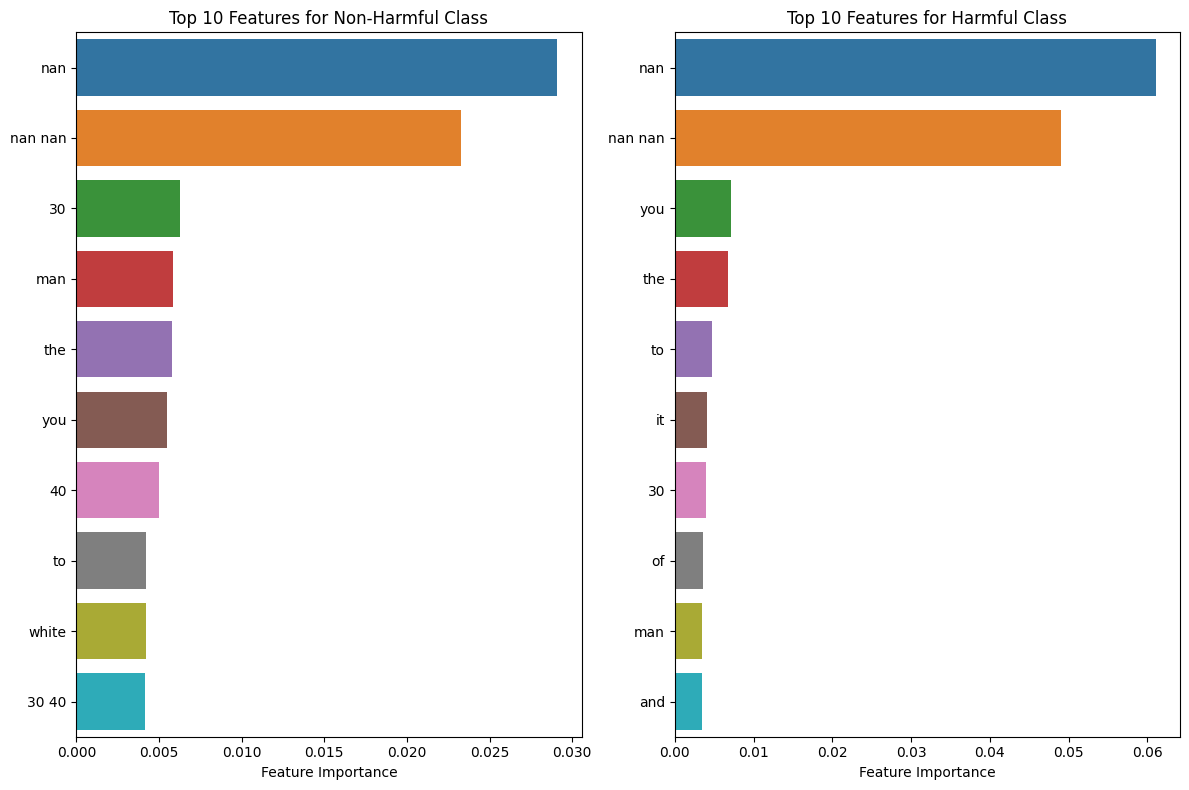

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.model_selection import learning_curve

# Load dataset
df = pd.read_csv('/kaggle/input/multilingual-meme-datasets/final_datasets.csv')
print(f"Dataset loaded with shape: {df.shape}")

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Non-Harmful', 'Harmful'])
    loss = log_loss(y_test, y_pred_proba)
    
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test Loss: {loss:.4f}')
    print('\nConfusion Matrix:')
    print(conf_matrix)
    print('\nClassification Report:')
    print(class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Harmful', 'Harmful'], 
                yticklabels=['Non-Harmful', 'Harmful'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig('naive_bayes_confusion_matrix.png')
    plt.show()
    
    return accuracy, loss, conf_matrix, class_report

# Function to plot training curves
def plot_training_curves(train_sizes, train_losses, valid_losses, train_accuracies, valid_accuracies):
    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, train_losses, 'o-', label='Training Loss')
    plt.plot(train_sizes, valid_losses, 'o-', label='Validation Loss')
    plt.xlabel('Training Examples')
    plt.ylabel('Loss (Log Loss)')
    plt.title('Training vs Validation Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_sizes, train_accuracies, 'o-', label='Training Accuracy')
    plt.plot(train_sizes, valid_accuracies, 'o-', label='Validation Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('naive_bayes_training_curves.png')
    plt.show()

# Function to generate learning curves
def generate_learning_curves(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    # Generate learning curves for loss and accuracy
    train_sizes, train_scores_acc, valid_scores_acc = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )
    
    # For loss, we need to create our own implementation since sklearn doesn't directly support log loss
    train_losses = []
    valid_losses = []
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    for train_size in train_sizes:
        train_loss_folds = []
        valid_loss_folds = []
        
        for train_idx, valid_idx in kf.split(X):
            X_train_fold, X_valid_fold = X.iloc[train_idx], X.iloc[valid_idx]
            y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]
            
            # Take only the specified percentage for training
            n_samples = int(len(X_train_fold) * train_size)
            X_train_subset = X_train_fold[:n_samples]
            y_train_subset = y_train_fold[:n_samples]
            
            # Fit the model
            estimator.fit(X_train_subset, y_train_subset)
            
            # Calculate loss
            train_proba = estimator.predict_proba(X_train_subset)
            valid_proba = estimator.predict_proba(X_valid_fold)
            
            train_loss = log_loss(y_train_subset, train_proba)
            valid_loss = log_loss(y_valid_fold, valid_proba)
            
            train_loss_folds.append(train_loss)
            valid_loss_folds.append(valid_loss)
        
        train_losses.append(np.mean(train_loss_folds))
        valid_losses.append(np.mean(valid_loss_folds))
    
    # Calculate mean and std of scores
    train_mean_acc = np.mean(train_scores_acc, axis=1)
    valid_mean_acc = np.mean(valid_scores_acc, axis=1)
    
    return train_sizes, train_losses, valid_losses, train_mean_acc, valid_mean_acc

# Function to analyze dataset
def analyze_dataset(df):
    """
    Analyze the dataset to understand its structure and content.
    """
    print("\n=== Dataset Analysis ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Column names: {df.columns.tolist()}")
    
    # Check label distribution
    print("\nLabel distribution:")
    label_counts = df['label'].value_counts()
    print(label_counts)
    
    # Show sample text entries
    print("\nSample translated_text entries:")
    for i, text in enumerate(df['translated_text'].head(5)):
        print(f"{i+1}: {text[:100]}...")
    
    # Check for missing values
    print("\nMissing values by column:")
    print(df.isnull().sum())
    
    # Analyze text lengths
    df['text_length'] = df['translated_text'].apply(lambda x: len(str(x).split()))
    print("\nText length statistics:")
    print(f"Mean: {df['text_length'].mean():.2f} words")
    print(f"Median: {df['text_length'].median()} words")
    print(f"Min: {df['text_length'].min()} words")
    print(f"Max: {df['text_length'].max()} words")
    
    # Plot text length distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['text_length'].clip(upper=200), bins=40, alpha=0.7)
    plt.xlabel('Text Length (words)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Text Lengths')
    plt.savefig('text_length_distribution.png')
    plt.show()
    
    return df

# Main function for Naive Bayes implementation
def main():
    # Prepare the text data
    # Combine relevant text fields into a single feature
    df['combined_text'] = df.apply(
        lambda row: f"{row['gender']} {row['age']} {row['age_bucket']} {row['dominant_emotion']} {row['dominant_race']} {row['translated_text']}",
        axis=1
    )
    
    # Split dataset
    X = df['combined_text']
    y = df['label']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    print(f"Train set: {len(X_train)}, Validation set: {len(X_valid)}, Test set: {len(X_test)}")
    
    # Create a pipeline with TF-IDF and Naive Bayes
    nb_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
        ('classifier', MultinomialNB(alpha=0.1))  # Alpha is the smoothing parameter
    ])
    
    # Generate learning curves
    print("\nGenerating learning curves...")
    # Combine training and validation for learning curve analysis
    X_train_val = pd.concat([X_train, X_valid])
    y_train_val = pd.concat([y_train, y_valid])
    
    train_sizes, train_losses, valid_losses, train_accuracies, valid_accuracies = generate_learning_curves(
        nb_pipeline, X_train_val, y_train_val, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Plot the learning curves
    plot_training_curves(train_sizes, train_losses, valid_losses, train_accuracies, valid_accuracies)
    
    # Hyperparameter tuning for Naive Bayes
    print("\nPerforming hyperparameter tuning...")
    best_alpha = 0.1
    best_val_accuracy = 0.0
    
    alphas = [0.001, 0.01, 0.1, 0.5, 1.0]
    val_accuracies = []
    val_losses = []
    
    # Train and evaluate on different alpha values
    for alpha in alphas:
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
            ('classifier', MultinomialNB(alpha=alpha))
        ])
        pipeline.fit(X_train, y_train)
        
        # Get predictions
        y_valid_pred = pipeline.predict(X_valid)
        y_valid_proba = pipeline.predict_proba(X_valid)
        
        # Calculate metrics
        current_val_accuracy = accuracy_score(y_valid, y_valid_pred)
        current_val_loss = log_loss(y_valid, y_valid_proba)
        
        val_accuracies.append(current_val_accuracy)
        val_losses.append(current_val_loss)
        
        print(f"Alpha = {alpha}: Validation accuracy = {current_val_accuracy:.4f}, Loss = {current_val_loss:.4f}")
        
        if current_val_accuracy > best_val_accuracy:
            best_val_accuracy = current_val_accuracy
            best_alpha = alpha
    
    print(f"\nBest alpha value: {best_alpha} with validation accuracy: {best_val_accuracy:.4f}")
    
    # Plot hyperparameter tuning results
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy vs alpha
    plt.subplot(1, 2, 1)
    plt.plot(alphas, val_accuracies, 'o-')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy vs Alpha')
    
    # Plot loss vs alpha
    plt.subplot(1, 2, 2)
    plt.plot(alphas, val_losses, 'o-')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss vs Alpha')
    
    plt.tight_layout()
    plt.savefig('naive_bayes_hyperparameter_tuning.png')
    plt.show()
    
    # Create final model with best alpha
    final_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
        ('classifier', MultinomialNB(alpha=best_alpha))
    ])
    
    # Train on combined training and validation sets
    X_train_full = pd.concat([X_train, X_valid])
    y_train_full = pd.concat([y_train, y_valid])
    
    print("\nTraining final model on combined training and validation data...")
    final_pipeline.fit(X_train_full, y_train_full)
    
    # Evaluate on test set
    print("\nEvaluating final model on test set...")
    accuracy, loss, conf_matrix, class_report = evaluate_model(final_pipeline, X_test, y_test)
    
    # Save the trained model
    import joblib
    joblib.dump(final_pipeline, 'naive_bayes_harmful_content_classifier.joblib')
    print("Naive Bayes model saved successfully!")
    
    # Feature importance analysis
    print("\nAnalyzing feature importance...")
    feature_names = final_pipeline.named_steps['tfidf'].get_feature_names_out()
    nb_classifier = final_pipeline.named_steps['classifier']
    
    # For each class, get the top features
    feature_importance = np.exp(nb_classifier.feature_log_prob_)
    
    # Get top 20 features for each class
    for i, class_label in enumerate(['Non-Harmful', 'Harmful']):
        # Sort feature indices by importance
        top_indices = feature_importance[i].argsort()[-20:][::-1]
        top_features = [(feature_names[j], feature_importance[i][j]) for j in top_indices]
        
        print(f"\nTop 20 features for class '{class_label}':")
        for feature, importance in top_features:
            print(f"{feature}: {importance:.4f}")
    
    # Plot top features
    plt.figure(figsize=(12, 8))
    
    # Plot for non-harmful class (class 0)
    plt.subplot(1, 2, 1)
    top_indices_0 = feature_importance[0].argsort()[-10:][::-1]
    top_features_0 = [feature_names[i] for i in top_indices_0]
    top_importance_0 = [feature_importance[0][i] for i in top_indices_0]
    
    sns.barplot(x=top_importance_0, y=top_features_0)
    plt.title('Top 10 Features for Non-Harmful Class')
    plt.xlabel('Feature Importance')
    
    # Plot for harmful class (class 1)
    plt.subplot(1, 2, 2)
    top_indices_1 = feature_importance[1].argsort()[-10:][::-1]
    top_features_1 = [feature_names[i] for i in top_indices_1]
    top_importance_1 = [feature_importance[1][i] for i in top_indices_1]
    
    sns.barplot(x=top_importance_1, y=top_features_1)
    plt.title('Top 10 Features for Harmful Class')
    plt.xlabel('Feature Importance')
    
    plt.tight_layout()
    plt.savefig('naive_bayes_feature_importance.png')
    plt.show()

if __name__ == "__main__":
    # Analyze the dataset first
    df = analyze_dataset(df)
    # Run the main training procedure with Naive Bayes
    main()